# IMDB Movie Review Classification

In [1]:
# Lets use the custom function  with autoreload option

%load_ext autoreload
%autoreload 2

import custom_function as fn

In [2]:
# Load Imports

import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",50)
pd.set_option('display.max_colwidth', 250)

# Load imports for NLP
import nltk
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import joblib
import tensorflow as tf
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers

In [3]:
# Setting random seed for reproducibility
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)
tf.config.experimental.enable_op_determinism()

## Load the Data


Load the joblib containing the data frame from sentiment analysis movie review of the project.
Drop any reviews that do not have a rating.
Use the original review column as your X and the classification target (High/Low Rating Reviews) as your y.

In [4]:
# load data
df = joblib.load('Data/nlp/processed-nlp-data.joblib')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 8649
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       6345 non-null   object 
 1   movie_id        6345 non-null   int64  
 2   imdb_id         6345 non-null   object 
 3   original_title  6345 non-null   object 
 4   review          6345 non-null   object 
 5   rating          6345 non-null   float64
 6   target          2034 non-null   object 
 7   tokens          6345 non-null   object 
 8   lemmas          6345 non-null   object 
 9   tokens-joined   6345 non-null   object 
 10  lemmas-joined   6345 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 594.8+ KB


In [5]:
# Drop the rows with any reviews missing

df.dropna(subset =['target'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 1 to 8647
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       2034 non-null   object 
 1   movie_id        2034 non-null   int64  
 2   imdb_id         2034 non-null   object 
 3   original_title  2034 non-null   object 
 4   review          2034 non-null   object 
 5   rating          2034 non-null   float64
 6   target          2034 non-null   object 
 7   tokens          2034 non-null   object 
 8   lemmas          2034 non-null   object 
 9   tokens-joined   2034 non-null   object 
 10  lemmas-joined   2034 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 190.7+ KB


**Use the original review column as your X and the classification target (High/Low Rating Reviews) as your y.**

In [6]:
# here we have target as high/low rating reviews
df['target'].value_counts()

high    1091
low      943
Name: target, dtype: int64

In [7]:
# Define X and y

X = df['review']
y = df['target']

In [8]:
y.unique()

array(['high', 'low'], dtype=object)

## Train Test Split for modeling


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=123)
X_train.head()

5977    Creed II takes pieces of the previous Rocky stories and is able to completely transform them into a better, more emotional story that can easily resonate with audiences.\r\n\r\nIf I have one big complaint about this installment, it would be that ...
3848                                                                                                                                                                                                          This is the most incredible movie I've ever seen :)
5182    **UNfortunately-FORGETTABLE film!**\r\n\r\nDirectional debut for a producer. I think she did well. But the film had a major issue. The film was decent with nice performances and production quality. Though it came at a wrong era. Came in too late,...
5106    Sensational! <em>'Coco'</em> is straight into my top five of Disney animations.\r\n\r\nThe whole 105 minutes are a joy to watch, thanks to its rich and highly meaningful story alongside the wonderful animation and shar

## CountVectorizer

In [10]:
count_vectorizer = CountVectorizer(stop_words= None, ngram_range= (1,2))

count_vectorizer.fit(X_train)

CountVectorizer(ngram_range=(1, 2))

In [11]:
# get the vocabulary from vectorizer

vocab_size = count_vectorizer.vocabulary_
len(vocab_size)

198706

## Modeling (ML)

### Pipeline Multinomial and Logisticregression

In [38]:
# Create a pipeline with countvectorizer and model

bayes_pipe = Pipeline([('vectorizer', CountVectorizer()), ('clf', MultinomialNB())])
lr_pipe = Pipeline([('vectorizer', CountVectorizer()), ('clf', LogisticRegression(max_iter =500))])


### Multinomial NB

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.98      0.97      0.98       865
         low       0.97      0.98      0.98       762

    accuracy                           0.98      1627
   macro avg       0.98      0.98      0.98      1627
weighted avg       0.98      0.98      0.98      1627



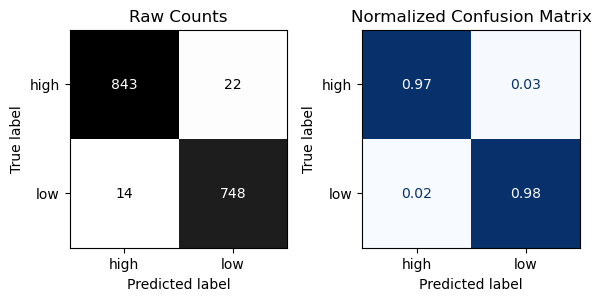


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.88      0.91      0.89       226
         low       0.88      0.84      0.86       181

    accuracy                           0.88       407
   macro avg       0.88      0.87      0.88       407
weighted avg       0.88      0.88      0.88       407



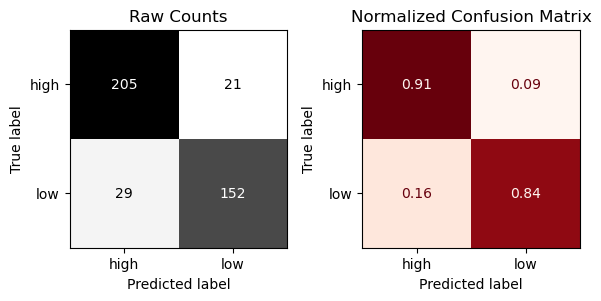

In [39]:
# Fit an evaluate a Naive Bayes Classifier model
bayes_pipe.fit(X_train, y_train)
fn.evaluate_classification(bayes_pipe, X_train, y_train, X_test, y_test)

### Logistic Regression

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       865
         low       1.00      1.00      1.00       762

    accuracy                           1.00      1627
   macro avg       1.00      1.00      1.00      1627
weighted avg       1.00      1.00      1.00      1627



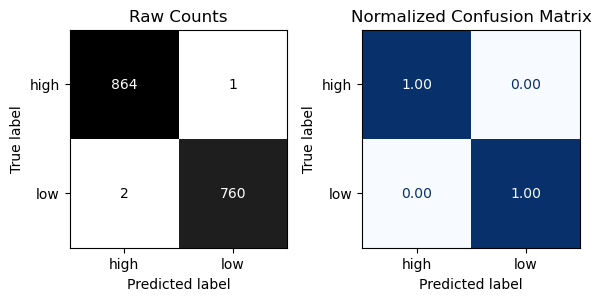


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.85      0.85      0.85       226
         low       0.82      0.82      0.82       181

    accuracy                           0.84       407
   macro avg       0.84      0.84      0.84       407
weighted avg       0.84      0.84      0.84       407



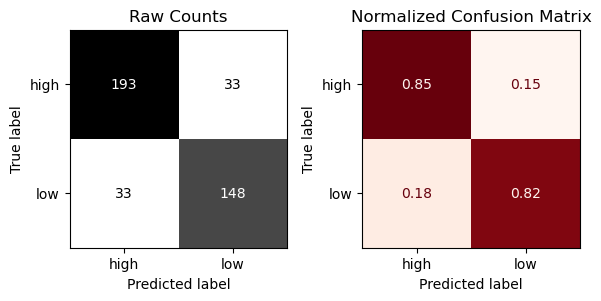

In [40]:
## Fit an evaluate a Logistic Regression model
lr_pipe.fit(X_train, y_train)
fn.evaluate_classification(lr_pipe, X_train, y_train, X_test, y_test)

With testing accuracy of 89% and training accuracy of 100% clearly model shows overfitting. Lets try Logistic  regression

Logistic regression also overfit as Naive Bayes. Now, cosidering applying GridSearch to tune the model and reduce overfitting.

### GridSearch Text Vectorization

Construct a grid of parameters for the text vectorization step. 

Consider trying with
- CountVectorizer/TfidfVectorizer
- stopwords
- ngram_range
- min_df/max_df

In [47]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('vectorizer', CountVectorizer()),
  ('clf', LogisticRegression(max_iter=500))],
 'verbose': False,
 'vectorizer': CountVectorizer(),
 'clf': LogisticRegression(max_iter=500),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.int64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__preprocessor': None,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__vocabulary': None,
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 500,
 'clf__multi_class': 'auto',
 'clf__n_jobs':

In [48]:
bayes_pipe.get_params()

{'memory': None,
 'steps': [('vectorizer', CountVectorizer()), ('clf', MultinomialNB())],
 'verbose': False,
 'vectorizer': CountVectorizer(),
 'clf': MultinomialNB(),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.int64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__preprocessor': None,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__vocabulary': None,
 'clf__alpha': 1.0,
 'clf__class_prior': None,
 'clf__fit_prior': True,
 'clf__force_alpha': 'warn'}

In [53]:
# Define the parameter grid for vectorizers
# shared params
param_grid = {
    'vectorizer__max_df': [0.7,0.8,0.9],
    'vectorizer__min_df': [2,3,4,5],
    'vectorizer__stop_words': [None,'english'],
    'vectorizer__ngram_range': [(1, 2),(1,3)],   
}

# params for countVectorizer
param_grid_count = {
    'vectorizer':[CountVectorizer()],
    **param_grid
}

# params for TfidfVectorizer
param_grid_tfidf = {
    'vectorizer': [TfidfVectorizer()],
    "vectorizer__norm": ["l1", "l2"],
    "vectorizer__use_idf": [True, False],
    **param_grid
}

#combining params
vect_params_combined = [param_grid_count, param_grid_tfidf]

# params for models need to set

params_MNB = {
    'clf' : [MultinomialNB()],
    'clf__alpha' : [.5, 1],
}

params_lr = {
    'clf': [LogisticRegression(random_state = 123, solver='lbfgs',max_iter=500)],
    'clf__C' : [.1, 1, 10, 100],
}

model_params_combined = [params_MNB, params_lr]



In [54]:
# using iterpools to create all combinations of vectorizers
import itertools
combined_params = list(itertools.product(vect_params_combined, model_params_combined))
combined_params[1]

({'vectorizer': [CountVectorizer()],
  'vectorizer__max_df': [0.7, 0.8, 0.9],
  'vectorizer__min_df': [2, 3, 4, 5],
  'vectorizer__stop_words': [None, 'english'],
  'vectorizer__ngram_range': [(1, 2), (1, 3)]},
 {'clf': [LogisticRegression(max_iter=500, random_state=123)],
  'clf__C': [0.1, 1, 10, 100]})

In [55]:
#use loop to combine the parameter grids for each combination
final_params = []
for vector_params, model_params in combined_params:
    combined = {**vector_params, **model_params}
    final_params.append(combined)
final_params[0]

{'vectorizer': [CountVectorizer()],
 'vectorizer__max_df': [0.7, 0.8, 0.9],
 'vectorizer__min_df': [2, 3, 4, 5],
 'vectorizer__stop_words': [None, 'english'],
 'vectorizer__ngram_range': [(1, 2), (1, 3)],
 'clf': [MultinomialNB()],
 'clf__alpha': [0.5, 1]}

### GridSearchCV

In [56]:
%%time
#combine the best model using GridSearchCV
grid_search = GridSearchCV(bayes_pipe, final_params, cv=3, scoring='accuracy', 
                          verbose=1, n_jobs=-1)
#fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
CPU times: user 11.1 s, sys: 8.38 s, total: 19.5 s
Wall time: 4min 56s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'clf': [MultinomialNB(alpha=1)],
                          'clf__alpha': [0.5, 1],
                          'vectorizer': [CountVectorizer(max_df=0.7, min_df=3,
                                                         ngram_range=(1, 3))],
                          'vectorizer__max_df': [0.7, 0.8, 0.9],
                          'vectorizer__min_df': [2, 3, 4, 5],
                          'vectorizer__ngram_range': [(1, 2), (1,...
                         {'clf': [LogisticRegression(max_iter=500,
                                                     random_state=123)],
                          'clf__C': [0.1, 1, 10, 100],
                          'vectorizer': [TfidfVectorizer()],
                          'vectorizer__max_df': [0.7, 0.8, 0.9],
                          'vectorizer__min_df': [2, 3, 4, 5],
                          'vectorizer__ngram_range': [(1, 2), (1, 3)],
                          'vectorizer__norm': ['l1', 'l2'],
                          'vectorizer__stop_words': [None, 'english'],
                          'vectorizer__use_idf': [True, False]}],
             scoring='accuracy', verbose=1)

In [57]:
# get the best combination
grid_search.best_params_

{'clf': MultinomialNB(alpha=1),
 'clf__alpha': 1,
 'vectorizer': CountVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 3)),
 'vectorizer__max_df': 0.7,
 'vectorizer__min_df': 3,
 'vectorizer__ngram_range': (1, 3),
 'vectorizer__stop_words': None}

### Best model from gridsearch

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       865
         low       0.99      0.98      0.99       762

    accuracy                           0.99      1627
   macro avg       0.99      0.99      0.99      1627
weighted avg       0.99      0.99      0.99      1627



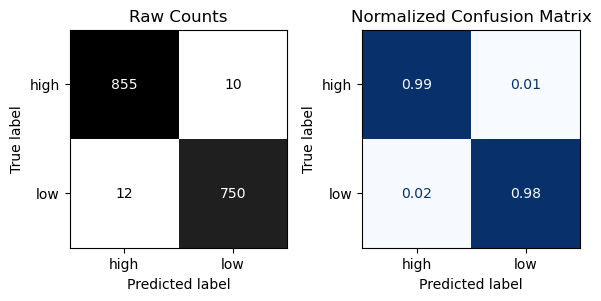


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.89      0.90      0.89       226
         low       0.87      0.86      0.86       181

    accuracy                           0.88       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.88      0.88      0.88       407



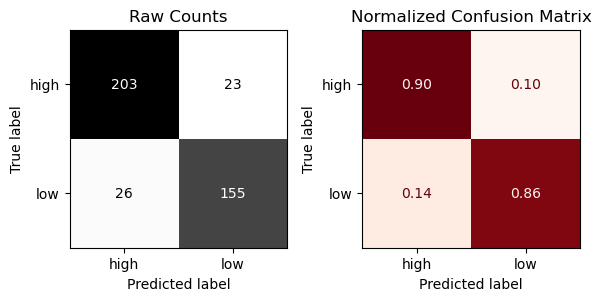

In [58]:
#evaluate best model
best_model = grid_search.best_estimator_
fn.evaluate_classification(best_model, X_train, y_train, X_test, y_test)

With best parameters it gives training accuracy of 99% and testing as 88%. This is overfitting. We can still tune our model with more hypertuning. For now we will move on to Deep NLP.


### Save the best model as Joblib

In [59]:
# not sure why to save train and test data but instead preprocessing steps are alreday saved so skipping this step

# # Save training data
# fpath_train_data = "Data/nlp/train-data.joblib"
# joblib.dump([X_train, y_train],fpath_train_data)
    
# # Save test data
# fpath_test_data = "Data/nlp/test-data.joblib"
# joblib.dump([X_test, y_test],fpath_test_data)
    
# Saving the best model 
best_model_path  = "models/best-ml-gridsearch-model.joblib"
joblib.dump(best_model, best_model_path)

['models/best-ml-gridsearch-model.joblib']

## Modeling - Deep NLP